In [1]:
#ignore kind of warnings
import warnings
warnings.filterwarnings('ignore')

## Data Collection and preprocessing

In [2]:
import pandas as pd
import math as m

In [3]:
dataset = pd.read_csv("stock_market.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3201 non-null   object 
 1   Open     3201 non-null   float64
 2   High     3201 non-null   float64
 3   Low      3201 non-null   float64
 4   Close    3201 non-null   float64
 5   Volume   3201 non-null   int64  
 6   OpenInt  3201 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 175.2+ KB


In [5]:
dataset.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3201.0
mean,94.052340,94.186939,93.886776,94.044129,1.263379e+06,0.0
std,8.701177,8.673266,8.751381,8.703700,1.162817e+06,0.0
min,76.312000,77.664000,73.282000,74.626000,3.686600e+04,0.0
25%,85.688000,85.865000,85.416000,85.661000,5.301920e+05,0.0
50%,92.135000,92.283000,92.045000,92.135000,8.950500e+05,0.0
75%,101.690000,101.780000,101.620000,101.710000,1.693460e+06,0.0
max,110.080000,110.200000,109.970000,110.110000,1.345202e+07,0.0


In [6]:
dataset.drop(columns="OpenInt",inplace=True)

In [8]:
#CONVERT DATE INTO DATETIME  FORMAT
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [9]:
dataset = dataset.sort_values(by="Date",ascending=True)

## Feature Engineering

In [10]:
labels = []
threshold = 0.003
for i in range(len(dataset) - 1):
    ret = (dataset.iloc[i + 1]['Close'] - dataset.iloc[i]['Close']) / dataset.iloc[i]['Close']
    if ret > threshold:
        labels.append(1)
    else:
        labels.append(0)
labels.append(None)
dataset['Label'] = labels
dataset.dropna(subset=['Label'], inplace=True)
dataset['Label'] = dataset['Label'].astype(int)


In [11]:
#Adding Technical Features 1.Daily return %
daily_return = []
for i in range(len(dataset)) :
    openprice = dataset.iloc[i]["Open"]
    closeprice = dataset.iloc[i]["Close"]
    daily_charge = ((closeprice-openprice)/openprice)*100
    daily_return.append(daily_charge)
dataset["DailyReturn"] = daily_return

In [12]:
#Finding the Moving averages
dataset['3-Day MA'] = dataset['Close'].rolling(window=3).mean()
dataset['5-Day MA'] = dataset['Close'].rolling(window=5).mean()
dataset['10-Day MA'] = dataset['Close'].rolling(window=10).mean()

In [13]:
close_lag1 = []
close_lag2 = []
volume_lag = []
return_lag1 = []
"""
close_lag1 = the previous close price
close_lag2 = close_price of two days ago
volume_lag = Shows teh trading of the VOlume of the previous day
"""

for i in range(len(dataset)):
    if i >= 2:
        close_lag1.append(dataset['Close'][i-1])
        close_lag2.append(dataset['Close'][i-2])
        volume_lag.append(dataset['Volume'][i-1])
        return_lag1.append(daily_return[i-1])
    elif i == 1:
        close_lag1.append(dataset['Close'][i-1])
        close_lag2.append(None)
        volume_lag.append(dataset['Volume'][i-1])
        return_lag1.append(daily_return[i-1])
    else:
        close_lag1.append(None)
        close_lag2.append(None)
        volume_lag.append(None)
        return_lag1.append(None)

dataset['Close_lag1'] = close_lag1
dataset['Close_lag2'] = close_lag2
dataset['volume_lag'] = volume_lag
dataset['return_lag1'] = return_lag1

In [14]:
#Now removing the rows which are by NAN
dataset.dropna(inplace=True)

In [15]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Label,DailyReturn,3-Day MA,5-Day MA,10-Day MA,Close_lag1,Close_lag2,volume_lag,return_lag1
9,2005-03-10,85.645,85.645,85.315,85.399,204416,0,-0.287232,85.642000,85.8652,85.9931,85.501,86.026,130686.0,-0.375191
10,2005-03-11,85.596,85.596,85.256,85.470,103512,0,-0.147203,85.456667,85.7214,85.8885,85.399,85.501,204416.0,-0.287232
11,2005-03-14,85.390,85.477,85.207,85.435,153491,0,0.052699,85.434667,85.5662,85.8033,85.470,85.399,103512.0,-0.147203
12,2005-03-15,85.605,85.614,85.306,85.451,127616,0,-0.179896,85.452000,85.4512,85.7499,85.435,85.470,153491.0,0.052699
13,2005-03-16,85.451,85.679,85.300,85.511,111783,0,0.070216,85.465667,85.4532,85.7136,85.451,85.435,127616.0,-0.179896


In [16]:
dataset.reset_index().head()

,index,Date,Open,High,Low,Close,Volume,Label,DailyReturn,3-Day MA,5-Day MA,10-Day MA,Close_lag1,Close_lag2,volume_lag,return_lag1
0,9,2005-03-10,85.645,85.645,85.315,85.399,204416,0,-0.287232,85.642000,85.8652,85.9931,85.501,86.026,130686.0,-0.375191
1,10,2005-03-11,85.596,85.596,85.256,85.470,103512,0,-0.147203,85.456667,85.7214,85.8885,85.399,85.501,204416.0,-0.287232
2,11,2005-03-14,85.390,85.477,85.207,85.435,153491,0,0.052699,85.434667,85.5662,85.8033,85.470,85.399,103512.0,-0.147203
3,12,2005-03-15,85.605,85.614,85.306,85.451,127616,0,-0.179896,85.452000,85.4512,85.7499,85.435,85.470,153491.0,0.052699
4,13,2005-03-16,85.451,85.679,85.300,85.511,111783,0,0.070216,85.465667,85.4532,85.7136,85.451,85.435,127616.0,-0.179896


In [17]:
dataset['Label'].value_counts()

Label
0    2864
1     327
Name: count, dtype: int64

## Model Building

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = dataset.drop(columns=["Date","Label"])
y = dataset["Label"]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#Let us go with few models
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
y_log_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [37]:
#For Logistic regression Evaluation
print(f"Accuracy Score : {accuracy_score(y_test,y_log_pred)*100:.2f}%") #Which measures the percentage of correctly predicted instances.
print(f"precision Score : {precision_score(y_test,y_log_pred)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test,y_log_pred)*100:.2f}%")
print(f"F1 Score : {f1_score(y_test,y_log_pred)*100:.2f}%")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_log_pred)}")

Accuracy Score : 67.92%
precision Score : 16.43%
Recall Score: 56.45%
F1 Score : 25.45%
Confusion Matrix : 
[[399 178]
 [ 27  35]]


In [38]:
#Data Visuilazation
import seaborn as sns
import matplotlib.pyplot as plt

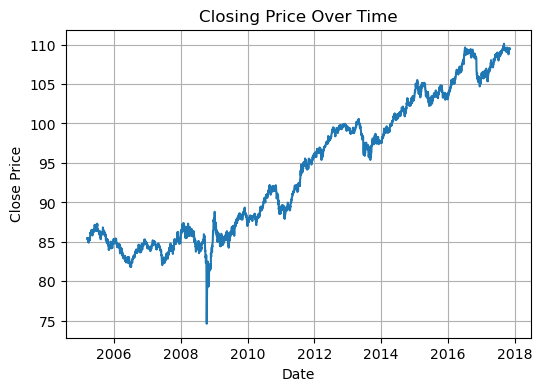

In [39]:
plt.figure(figsize=(6,4))
plt.plot(dataset['Date'], dataset['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

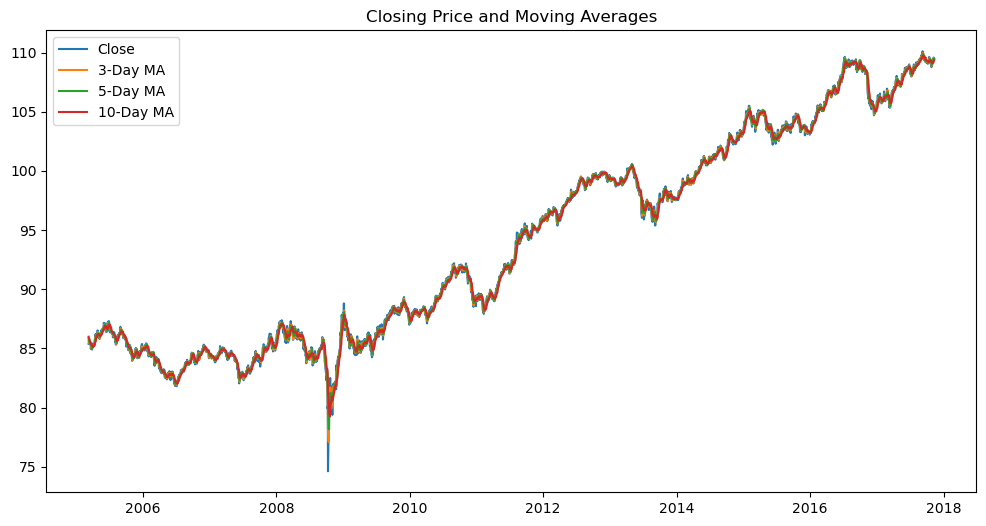

In [40]:
plt.figure(figsize=(12,6))
plt.plot(dataset['Date'], dataset['Close'], label='Close')
plt.plot(dataset['Date'], dataset['3-Day MA'], label='3-Day MA')
plt.plot(dataset['Date'], dataset['5-Day MA'], label='5-Day MA')
plt.plot(dataset['Date'], dataset['10-Day MA'], label='10-Day MA')
plt.legend()
plt.title('Closing Price and Moving Averages')
plt.show()

In [41]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)